In [1]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import matplotlib as mpl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import os

In [3]:
np.random.seed(42)

In [4]:
# To plot pretty figures
# %matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."

In [6]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [7]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    # fetch_openml() returns targets as strings
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)  # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [8]:
mnist.data.shape

(70000, 784)

In [9]:

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:

y.shape

(70000,)

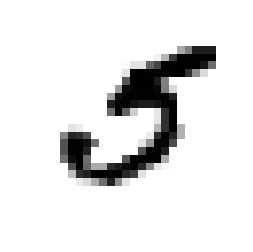

In [11]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
from sklearn.linear_model import SGDClassifier
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([1, 6, 6, ..., 0, 2, 9], dtype=int8)

In [14]:
y_train_even = (y_train%2==0)
y_test_even = (y_test%2==0)

In [15]:
y_train_even


array([False,  True,  True, ...,  True,  True, False])

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

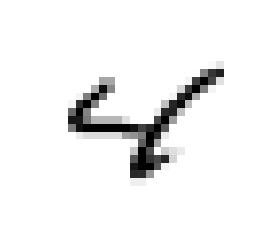

array([ True])

In [17]:
some_digit = X[28000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
sgd_clf.predict([some_digit])


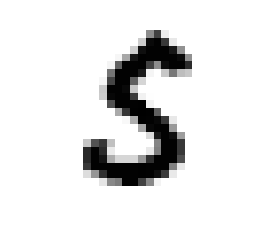

array([False])

In [18]:
some_digit = X[31000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
sgd_clf.predict([some_digit])

In [19]:
y_pred = sgd_clf.predict(X_test)

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_even, cv=3, scoring="accuracy")

array([0.85785711, 0.7514    , 0.8679934 ])

In [21]:
# from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_even, cv=3)
from sklearn.metrics import precision_score, recall_score

precision_score(y_test_even, y_pred)

0.9512451771308312

In [22]:
from sklearn.metrics import f1_score, accuracy_score
f1_score(y_test_even, y_pred)

0.6974411726886973

In [23]:
accuracy_score(y_test_even, y_pred)

0.7647

In [24]:
recall_score(y_test_even, y_pred)

0.5505481120584653

# KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train_even)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

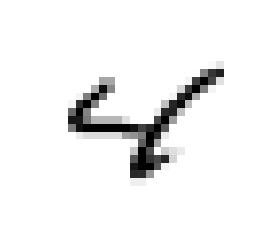

array([ True])

In [33]:
some_digit = X[28000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
kn_clf.predict([some_digit])

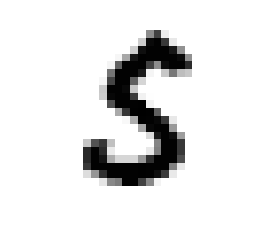

array([False])

In [34]:
some_digit = X[31000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()
kn_clf.predict([some_digit])

In [35]:
y_kn_pred = kn_clf.predict(X_test[:100,:])

In [36]:
accuracy_score(y_test_even[:100], y_kn_pred)

1.0

In [37]:
precision_score(y_test_even[:100], y_kn_pred)

1.0